In [76]:
import pandas as pd
import pickle
import os
import numpy as np
from plotnine import *
import seaborn as sns
from matplotlib import pyplot as plt

import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import heapq
plt.style.use('ggplot')
%matplotlib inline

wd5 = '/Users/tmm/Documents/GitHub/STA160-Project/STA160-Jobs-Market-Project/Data'
os.chdir(wd5)

In [2]:
master_data_in = open('jobs_data.pickle', 'rb')
master_data = pickle.load(master_data_in)
master_data_in.close()

data_scientist_df_in = open('data_scientist_data.pickle', 'rb')
data_scientist_df = pickle.load(data_scientist_df_in)
data_scientist_df_in.close()

data_engineer_df_in = open('data_engineer_data.pickle', 'rb')
data_engineer_df = pickle.load(data_engineer_df_in)
data_engineer_df_in.close()

data_analyst_df_in = open('data_analyst_data.pickle', 'rb')
data_analyst_df = pickle.load(data_analyst_df_in)
data_analyst_df_in.close()

BI_df_in = open('BI_data.pickle', 'rb')
BI_df= pickle.load(BI_df_in)
BI_df_in.close()

In [3]:
master_data

Search                                              Title  \
0           Data Scientist                                     Data Scientist   
1           Data Scientist                                     Data Scientist   
2           Data Scientist                                     Data Scientist   
3           Data Scientist                                     Data Scientist   
4           Data Scientist                                     Data Scientist   
5           Data Scientist                                     Data Scientist   
6           Data Scientist                                     Data Scientist   
7           Data Scientist                                     Data Scientist   
8           Data Scientist                                     Data Scientist   
9           Data Scientist                                     Data Scientist   
10          Data Scientist                                     Data Scientist   
11          Data Scientist                                     Data Scientist   
12          Data Scientist                                     Data Scientist   
13          Data Scientist                                     Data Scientist   
14          Data Scientist                                     Data Scientist   
15          Data Scientist                                     Data Scientist   
16          Data Scientist                                     Data Scientist   
17          Data Scientist                                     Data Scientist   
18          Data Scientist                                     Data Scientist   
19          Data Scientist                                Lead Data Scientist   
20          Data Scientist                              Senior Data Scientist   
21          Data Scientist                              Senior Data Scientist   
22          Data Scientist                              Senior Data Scientist   
23          Data Scientist                              Senior Data Scientist   
24          Data Scientist                                 Sr. Data Scientist   
25          Data Scientist                              Senior Data Scientist   
26          Data Scientist                              Senior Data Scientist   
27          Data Scientist                              Senior Data Scientist   
28          Data Scientist              Data Scientist (Quantitative Finance)   
29          Data Scientist              Data Scientist (Quantitative Finance)   
..                     ...                                                ...   
486  Business Intelligence                 Technical Customer Success Manager   
487  Business Intelligence                      Oracle Applications Developer   
488  Business Intelligence                              Director of Analytics   
489  Business Intelligence           Director of Delivery - Retail/E-Commerce   
490  Business Intelligence          Solutions Architect - Excel, SQL, Tableau   
491  Business Intelligence                 JD Edwards EnterpriseOne Developer   
492  Business Intelligence                     Software Developer (SSIS/SSRS)   
493  Business Intelligence                   Senior Product Marketing Manager   
494  Business Intelligence             Lead Solutions Architect ($100k-$150k)   
495  Business Intelligence                              Information Architect   
496  Business Intelligence                 JD Edwards EnterpriseOne Developer   
497  Business Intelligence                           Lead Solutions Architect   
498  Business Intelligence                 JD Edwards EnterpriseOne Developer   
499  Business Intelligence                             Senior Product Manager   
500  Business Intelligence     SharePoint Developer (Applications Management)   
501  Business Intelligence                                Microsoft Developer   
502  Business Intelligence  JD Edwards Enterprise One 9.1 Specialist - Con...   
503  Business Intelligence  Developer/Project Manag

# 1.) Data Exploration 

### Population Search Term Frequencies

In [4]:
search_counts = master_data['Search'].value_counts()
search_counts

Data Engineer            350
Data Scientist            71
Business Intelligence     48
Data Analyst              47
Name: Search, dtype: int64

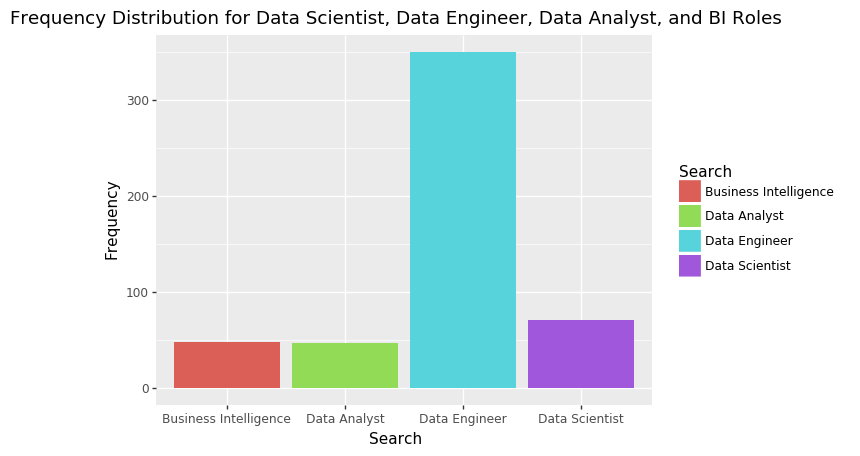

<ggplot: (-9223372029321640055)>

In [5]:
(ggplot(master_data, aes(x = 'Search',fill = 'Search')) +
 geom_bar(stat = "count", position='stack') +
 labs(title = "Frequency Distribution for Data Scientist, Data Engineer, Data Analyst, and BI Roles", x = "Search", y = "Frequency")
)

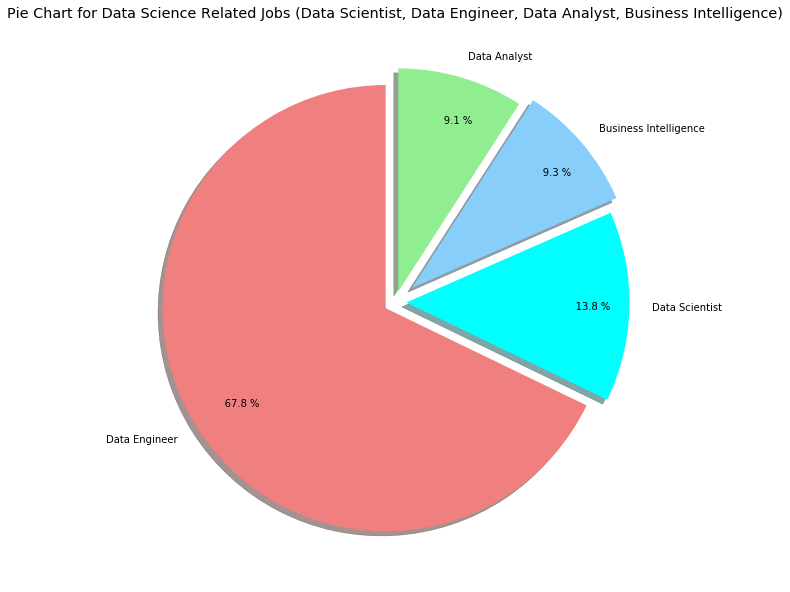

In [6]:
plt.rcParams['figure.figsize'] = (10,20)
labels = search_counts.index[0], search_counts.index[1], search_counts.index[2], search_counts.index[3]
fracs = [search_counts[i] for i in range(len(search_counts))]
explode = [0.05, 0.05, 0.1, 0.05]
plt.axes(aspect=1)  
colors = ['lightcoral', 'cyan','lightskyblue','lightgreen']
plt.title('Pie Chart for Data Science Related Jobs (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)')
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%9.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90, pctdistance = 0.8)
plt.show()

### Population State Frequencies

In [7]:
state_counts = master_data['States'].value_counts()
state_counts

CA    254
NY     50
MA     25
VA     20
WA     17
TX     14
PA     12
MD     11
NC     11
NJ     10
IL      9
GA      8
CO      7
MO      7
NV      6
DC      6
IN      5
TN      5
SC      4
AL      4
FL      4
MI      3
MN      3
RI      2
NE      2
NH      2
CT      2
ON      2
OH      2
OR      1
AB      1
ME      1
UT      1
KY      1
WI      1
KS      1
IA      1
AZ      1
Name: States, dtype: int64

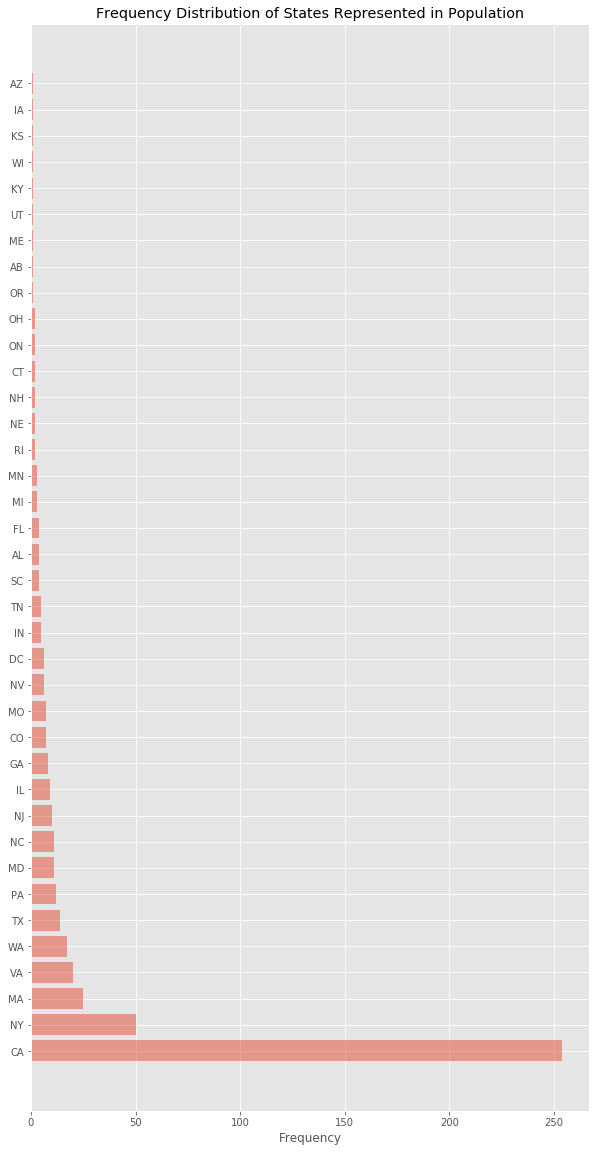

In [8]:
objects = state_counts.index
y_pos = np.arange(len(objects))
performance = state_counts.values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Frequency Distribution of States Represented in Population')
 
plt.show()

### Search Term Frequency Per State 

In [9]:
state_grouper = master_data.groupby('States')
jobs_per_state = state_grouper['Search'].value_counts()
jobs_per_state = jobs_per_state.reset_index(name = 'Frequency')
jobs_per_state

States                 Search  Frequency
0      AB         Data Scientist          1
1      AL          Data Engineer          3
2      AL  Business Intelligence          1
3      AZ           Data Analyst          1
4      CA          Data Engineer        178
5      CA         Data Scientist         35
6      CA  Business Intelligence         23
7      CA           Data Analyst         18
8      CO          Data Engineer          7
9      CT  Business Intelligence          1
10     CT          Data Engineer          1
11     DC          Data Engineer          5
12     DC           Data Analyst          1
13     FL          Data Engineer          4
14     GA          Data Engineer          4
15     GA           Data Analyst          3
16     GA  Business Intelligence          1
17     IA          Data Engineer          1
18     IL          Data Engineer          7
19     IL  Business Intelligence          1
20     IL         Data Scientist          1
21     IN  Business Intelligence          3
22     IN           Data Analyst          1
23     IN          Data Engineer          1
24     KS         Data Scientist          1
25     KY          Data Engineer          1
26     MA          Data Engineer         18
27     MA         Data Scientist          4
28     MA           Data Analyst          3
29     MD          Data Engineer         10
..    ...                    ...        ...
44     NJ         Data Scientist          2
45     NV           Data Analyst          4
46     NV          Data Engineer          2
47     NY          Data Engineer         23
48     NY         Data Scientist         14
49     NY  Business Intelligence          9
50     NY           Data Analyst          4
51     OH          Data Engineer          2
52     ON          Data Engineer          2
53     OR          Data Engineer          1
54     PA          Data Engineer          7
55     PA         Data Scientist          3
56     PA           Data Analyst          2
57     RI           Data Analyst          1
58     RI          Data Engineer          1
59     SC          Data Engineer          3
60     SC           Data Analyst          1
61     TN         Data Scientist          3
62     TN          Data Engineer          2
63     TX          Data Engineer          9
64     TX  Business Intelligence          4
65     TX         Data Scientist          1
66     UT          Data Engineer          1
67     VA          Data Engineer         17
68     VA         Data Scientist          2
69     VA           Data Analyst          1
70     WA          Data Engineer         14
71     WA         Data Scientist          2
72     WA  Business Intelligence          1
73     WI  Business Intelligence          1

[74 rows x 3 columns]

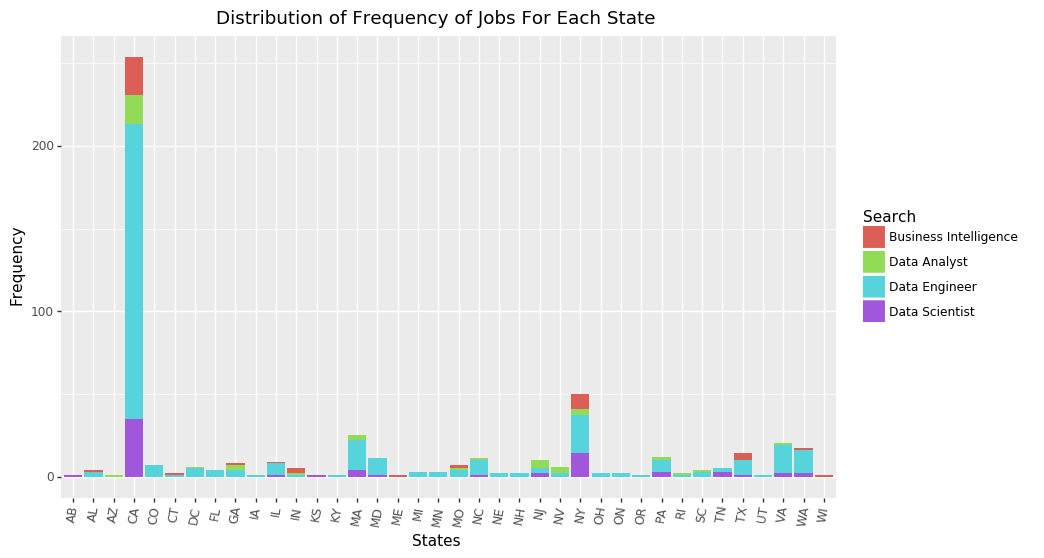

<ggplot: (-9223372029321179911)>

In [10]:
(ggplot(jobs_per_state, aes(x = "States", y = 'Frequency', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Jobs For Each State", x = "States", y = "Frequency")
)

### City Frequencies Per State

In [11]:
city_grouper = master_data.groupby('Location')
jobs_per_city = city_grouper['Search'].value_counts()
jobs_per_city = jobs_per_city.reset_index(name = 'Frequency')
jobs_per_city = jobs_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
jobs_per_city 

Location                 Search  Frequency
0       San Francisco, CA          Data Engineer         34
1            San Jose, CA          Data Engineer         19
2       New York City, NY          Data Engineer         17
3           San Mateo, CA          Data Engineer         16
4         Los Angeles, CA          Data Engineer         13
5       New York City, NY         Data Scientist         13
6             Seattle, WA          Data Engineer         12
7       San Francisco, CA         Data Scientist         12
8              Irvine, CA          Data Engineer         11
9           Palo Alto, CA          Data Engineer          8
10             Reston, VA          Data Engineer          7
11            Chicago, IL          Data Engineer          7
12             Irvine, CA  Business Intelligence          7
13          Arlington, VA          Data Engineer          7
14      Mountain View, CA          Data Engineer          6
15       Redwood City, CA          Data Engineer          6
16             Venice, CA          Data Engineer          5
17       White Plains, NY  Business Intelligence          5
18       Santa Monica, CA          Data Engineer          5
19         Washington, DC          Data Engineer          5
20         Burlington, MA          Data Engineer          5
21            Raleigh, NC          Data Engineer          5
22          Princeton, NJ           Data Analyst          4
23          San Diego, CA          Data Engineer          4
24          Cambridge, MA          Data Engineer          4
25          Las Vegas, NV           Data Analyst          4
26      New York City, NY           Data Analyst          4
27        Los Angeles, CA         Data Scientist          4
28          Sunnyvale, CA          Data Engineer          4
29         Charleston, SC          Data Engineer          3
..                    ...                    ...        ...
186          Portland, ME  Business Intelligence          1
187   Port Washington, NY  Business Intelligence          1
188          Plymouth, MN          Data Engineer          1
189  Plymouth Meeting, PA         Data Scientist          1
190         Charlotte, NC          Data Engineer          1
191        Chatsworth, CA          Data Engineer          1
192        Pittsburgh, PA         Data Scientist          1
193        Pittsburgh, PA           Data Analyst          1
194           Chicago, IL         Data Scientist          1
195         Pineville, NC         Data Scientist          1
196      Philadelphia, PA         Data Scientist          1
197      Philadelphia, PA           Data Analyst          1
198            Peoria, IL  Business Intelligence          1
199           Concord, CA          Data Engineer          1
200              Napa, CA         Data Scientist          1
201        Costa Mesa, CA  Business Intelligence          1
202      Palm Springs, CA           Data Analyst          1
203        Costa Mesa, CA          Data Engineer          1
204        Costa Mesa, CA         Data Scientist          1
205         Cupertino, CA          Data Engineer          1
206            Daphne, AL  Business Intelligence          1
207   North Hollywood, CA          Data Engineer          1
208            Newton, MA         Data Scientist          1
209            Newton, MA           Data Analyst          1
210     Newport Beach, CA          Data Engineer          1
211           Detroit, MI          Data Engineer          1
212          Dunwoody, GA          Data Engineer          1
213            Durham, NC          Data Engineer          1
214     East Setauket, NY          Data Engineer          1
215       Youngsville, NC          Data Engineer          1

[216 rows x 3 columns]

In [12]:
TOP_jobs = jobs_per_city.iloc[:20,]

In [13]:
TOP_jobs

Location                 Search  Frequency
0   San Francisco, CA          Data Engineer         34
1        San Jose, CA          Data Engineer         19
2   New York City, NY          Data Engineer         17
3       San Mateo, CA          Data Engineer         16
4     Los Angeles, CA          Data Engineer         13
5   New York City, NY         Data Scientist         13
6         Seattle, WA          Data Engineer         12
7   San Francisco, CA         Data Scientist         12
8          Irvine, CA          Data Engineer         11
9       Palo Alto, CA          Data Engineer          8
10         Reston, VA          Data Engineer          7
11        Chicago, IL          Data Engineer          7
12         Irvine, CA  Business Intelligence          7
13      Arlington, VA          Data Engineer          7
14  Mountain View, CA          Data Engineer          6
15   Redwood City, CA          Data Engineer          6
16         Venice, CA          Data Engineer          5
17   White Plains, NY  Business Intelligence          5
18   Santa Monica, CA          Data Engineer          5
19     Washington, DC          Data Engineer          5

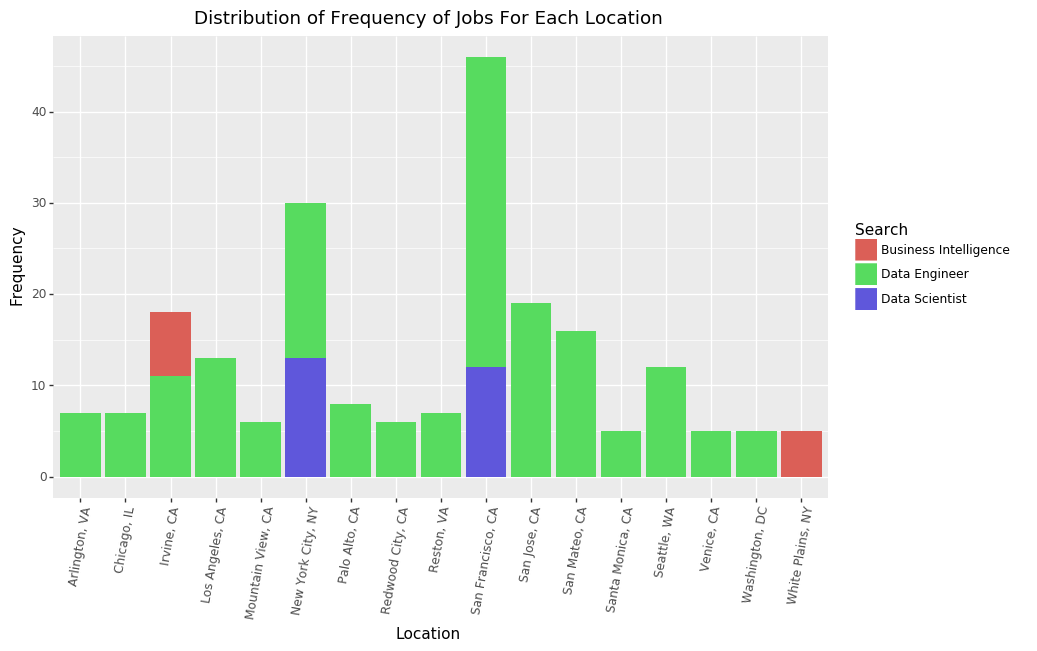

<ggplot: (7533856439)>

In [14]:
(ggplot(TOP_jobs, aes(x = "Location", y = 'Frequency', fill="Search")) +
 geom_bar(stat = "identity", position='stack')+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Jobs For Each Location", x = "Location", y = "Frequency")
)

### Data Scientist Listing Frequencies Per City

In [15]:
ds_city_grouper = data_scientist_df.groupby('Location')
ds_per_city = ds_city_grouper['Search'].value_counts()
ds_per_city = ds_per_city.reset_index(name = 'Frequency')
ds_per_city = ds_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
ds_per_city

Location          Search  Frequency
0      New York City, NY  Data Scientist         13
1      San Francisco, CA  Data Scientist         12
2        Los Angeles, CA  Data Scientist          4
3          Sunnyvale, CA  Data Scientist          3
4          San Mateo, CA  Data Scientist          3
5           San Jose, CA  Data Scientist          2
6          Cambridge, MA  Data Scientist          2
7          Nashville, TN  Data Scientist          2
8           Berkeley, CA  Data Scientist          2
9     West Hollywood, CA  Data Scientist          2
10      Santa Monica, CA  Data Scientist          1
11           Seattle, WA  Data Scientist          1
12           Trenton, NJ  Data Scientist          1
13      Redwood City, CA  Data Scientist          1
14  Plymouth Meeting, PA  Data Scientist          1
15        Pittsburgh, PA  Data Scientist          1
16         Pineville, NC  Data Scientist          1
17      Philadelphia, PA  Data Scientist          1
18            Newton, MA  Data Scientist          1
19        Alexandria, VA  Data Scientist          1
20              Napa, CA  Data Scientist          1
21            Austin, TX  Data Scientist          1
22           Leawood, KS  Data Scientist          1
23         Knoxville, TN  Data Scientist          1
24            Hazlet, NJ  Data Scientist          1
25       Foster City, CA  Data Scientist          1
26            Elmira, NY  Data Scientist          1
27        Costa Mesa, CA  Data Scientist          1
28           Chicago, IL  Data Scientist          1
29         Chantilly, VA  Data Scientist          1
30          Campbell, CA  Data Scientist          1
31           Calgary, AB  Data Scientist          1
32          Bethesda, MD  Data Scientist          1
33          Bellevue, WA  Data Scientist          1
34           Bedford, MA  Data Scientist          1
35    Woodland Hills, CA  Data Scientist          1

In [16]:
TOP_ds = ds_per_city.iloc[:10,]

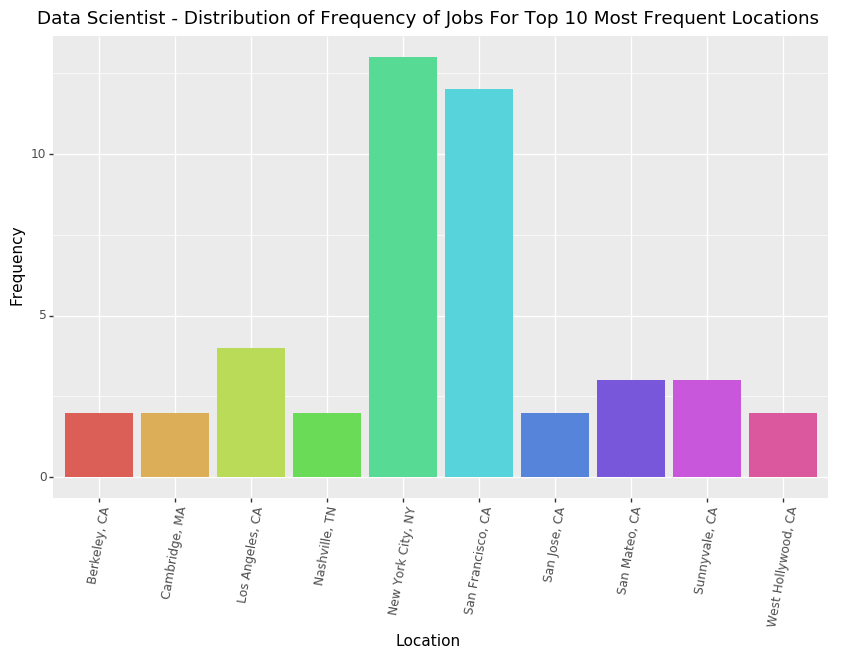

<ggplot: (7533872248)>

In [17]:
(ggplot(TOP_ds, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Scientist - Distribution of Frequency of Jobs For Top 10 Most Frequent Locations", x = "Location", y = "Frequency")
)

### Data Engineer Listing Frequencies Per City

In [18]:
de_city_grouper = data_engineer_df.groupby('Location')
de_per_city = de_city_grouper['Search'].value_counts()
de_per_city = de_per_city.reset_index(name = 'Frequency')
de_per_city = de_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
de_per_city

Location         Search  Frequency
0          San Francisco, CA  Data Engineer         34
1               San Jose, CA  Data Engineer         19
2          New York City, NY  Data Engineer         17
3              San Mateo, CA  Data Engineer         16
4            Los Angeles, CA  Data Engineer         13
5                Seattle, WA  Data Engineer         12
6                 Irvine, CA  Data Engineer         11
7              Palo Alto, CA  Data Engineer          8
8              Arlington, VA  Data Engineer          7
9                 Reston, VA  Data Engineer          7
10               Chicago, IL  Data Engineer          7
11          Redwood City, CA  Data Engineer          6
12         Mountain View, CA  Data Engineer          6
13               Raleigh, NC  Data Engineer          5
14            Washington, DC  Data Engineer          5
15                Venice, CA  Data Engineer          5
16          Santa Monica, CA  Data Engineer          5
17            Burlington, MA  Data Engineer          5
18             San Diego, CA  Data Engineer          4
19             Cambridge, MA  Data Engineer          4
20             Sunnyvale, CA  Data Engineer          4
21           Culver City, CA  Data Engineer          3
22                 Acton, MA  Data Engineer          3
23              Glendale, CA  Data Engineer          3
24           Jersey City, NJ  Data Engineer          3
25            Pittsburgh, PA  Data Engineer          3
26           Saint Louis, MO  Data Engineer          3
27             San Ramon, CA  Data Engineer          3
28                Austin, TX  Data Engineer          3
29                Boston, MA  Data Engineer          3
..                       ...            ...        ...
95             Baltimore, MD  Data Engineer          1
96             Arlington, TX  Data Engineer          1
97   Anne Arundel County, MD  Data Engineer          1
98    Annapolis Junction, MD  Data Engineer          1
99           Aliso Viejo, CA  Data Engineer          1
100           Alexandria, VA  Data Engineer          1
101             Dunwoody, GA  Data Engineer          1
102        East Setauket, NY  Data Engineer          1
103        Newport Beach, CA  Data Engineer          1
104           El Segundo, CA  Data Engineer          1
105             Melville, NY  Data Engineer          1
106               Mclean, VA  Data Engineer          1
107       Marina Del Rey, CA  Data Engineer          1
108            Manhattan, NY  Data Engineer          1
109           Long Beach, CA  Data Engineer          1
110               Lindon, UT  Data Engineer          1
111            Lexington, KY  Data Engineer          1
112            Knoxville, TN  Data Engineer          1
113            Kitchener, ON  Data Engineer          1
114         Johnson City, TN  Data Engineer          1
115         Indianapolis, IN  Data Engineer          1
116           Huntsville, AL  Data Engineer          1
117         Huntersville, NC  Data Engineer          1
118              Houston, TX  Data Engineer          1
119             Grinnell, IA  Data Engineer          1
120              Fremont, CA  Data Engineer          1
121               Fenton, MO  Data Engineer          1
122            Fairfield, CT  Data Engineer          1
123               Elmira, NY  Data Engineer          1
124          Youngsville, NC  Data Engineer          1

[125 rows x 3 columns]

In [19]:
TOP_de = de_per_city.iloc[:10,]

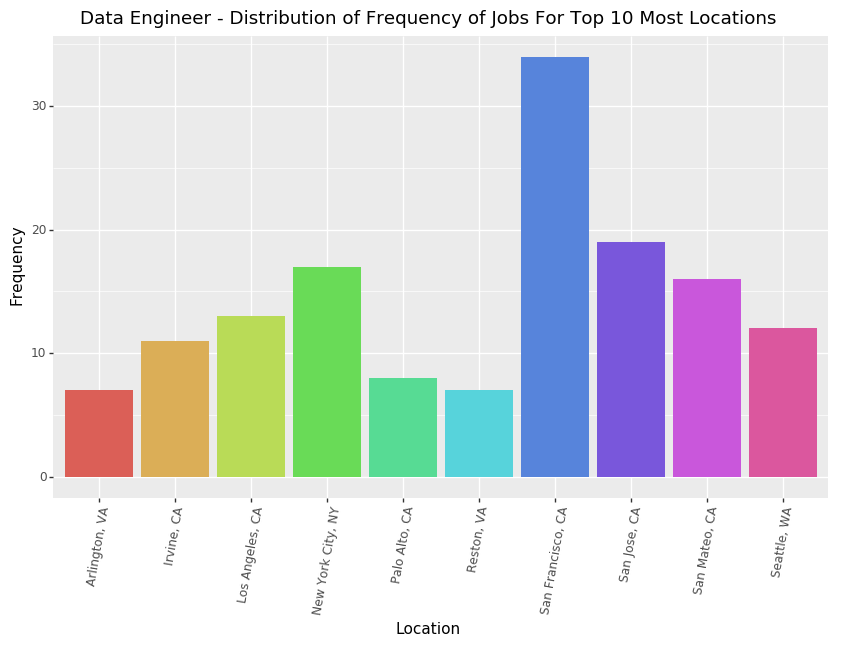

<ggplot: (-9223372029320980785)>

In [20]:
(ggplot(TOP_de, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Engineer - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

### Data Analyst Listing Frequencies Per City

In [21]:
da_city_grouper = data_analyst_df.groupby('Location')
da_per_city = da_city_grouper['Search'].value_counts()
da_per_city = da_per_city.reset_index(name = 'Frequency')
da_per_city = da_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
da_per_city

Location        Search  Frequency
0    New York City, NY  Data Analyst          4
1        Princeton, NJ  Data Analyst          4
2        Las Vegas, NV  Data Analyst          4
3          Atlanta, GA  Data Analyst          3
4          Ventura, CA  Data Analyst          3
5        San Ramon, CA  Data Analyst          2
6       Pleasanton, CA  Data Analyst          2
7        Cambridge, MA  Data Analyst          2
8           Orange, CA  Data Analyst          2
9   Woodland Hills, CA  Data Analyst          2
10   Laguna Niguel, CA  Data Analyst          2
11  Mount Pleasant, SC  Data Analyst          1
12       Randleman, NC  Data Analyst          1
13      Washington, DC  Data Analyst          1
14     Canoga Park, CA  Data Analyst          1
15          Venice, CA  Data Analyst          1
16      Scottsdale, AZ  Data Analyst          1
17      El Segundo, CA  Data Analyst          1
18   San Francisco, CA  Data Analyst          1
19      Providence, RI  Data Analyst          1
20          Mclean, VA  Data Analyst          1
21    Indianapolis, IN  Data Analyst          1
22     Jersey City, NJ  Data Analyst          1
23      Pittsburgh, PA  Data Analyst          1
24    Philadelphia, PA  Data Analyst          1
25     Kansas City, MO  Data Analyst          1
26          Newton, MA  Data Analyst          1
27    Palm Springs, CA  Data Analyst          1

In [22]:
TOP_da = da_per_city.iloc[:10,]

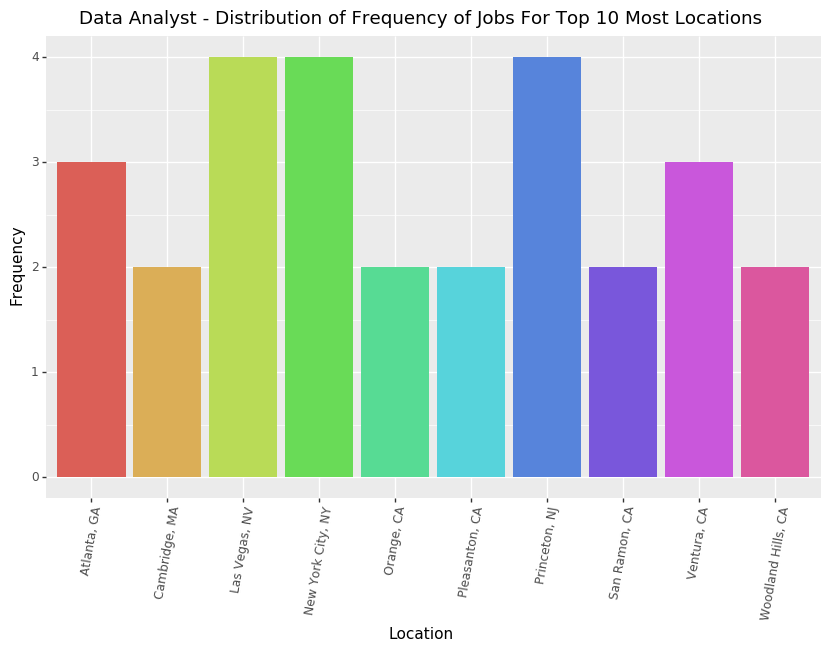

<ggplot: (-9223372029320313803)>

In [23]:
(ggplot(TOP_da, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Analyst - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

### Business Intelligence Listing Frequency Per City

In [24]:
bi_city_grouper = BI_df.groupby('Location')
bi_per_city = bi_city_grouper['Search'].value_counts()
bi_per_city = bi_per_city.reset_index(name = 'Frequency')
bi_per_city = bi_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
bi_per_city

Location                 Search  Frequency
0            Irvine, CA  Business Intelligence          7
1      White Plains, NY  Business Intelligence          5
2        South Bend, IN  Business Intelligence          3
3         San Mateo, CA  Business Intelligence          3
4         Palo Alto, CA  Business Intelligence          3
5          Milpitas, CA  Business Intelligence          2
6     San Francisco, CA  Business Intelligence          2
7     New York City, NY  Business Intelligence          2
8            Austin, TX  Business Intelligence          2
9         San Diego, CA  Business Intelligence          2
10     Redwood City, CA  Business Intelligence          1
11       Torrington, CT  Business Intelligence          1
12          Seattle, WA  Business Intelligence          1
13     Santa Monica, CA  Business Intelligence          1
14        Santa Ana, CA  Business Intelligence          1
15      Saint Louis, MO  Business Intelligence          1
16          Atlanta, GA  Business Intelligence          1
17         Portland, ME  Business Intelligence          1
18  Port Washington, NY  Business Intelligence          1
19    Missouri City, TX  Business Intelligence          1
20      Kansas City, MO  Business Intelligence          1
21          Houston, TX  Business Intelligence          1
22           Daphne, AL  Business Intelligence          1
23       Costa Mesa, CA  Business Intelligence          1
24         Brooklyn, NY  Business Intelligence          1
25           Berlin, WI  Business Intelligence          1
26           Peoria, IL  Business Intelligence          1

In [25]:
TOP_bi = bi_per_city.iloc[:10,]

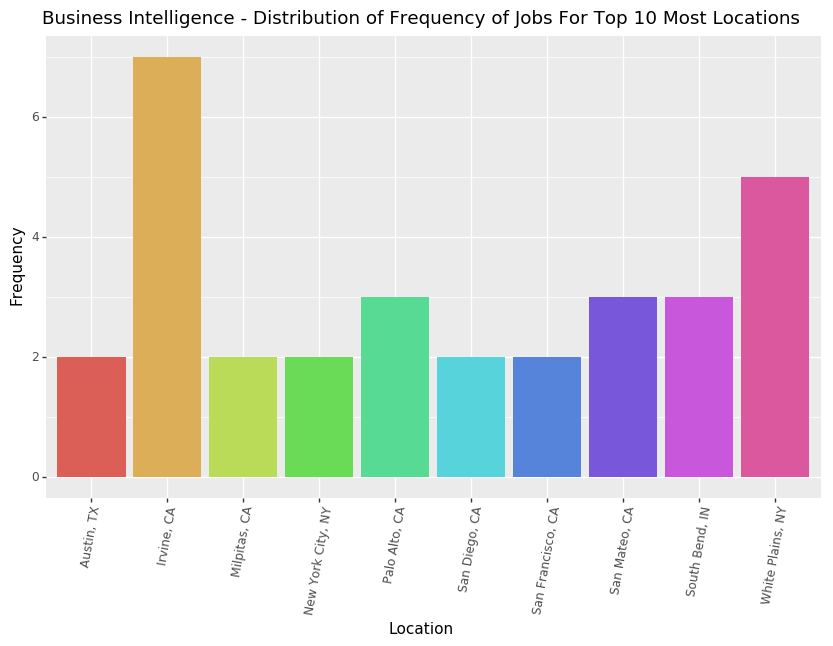

<ggplot: (7534619151)>

In [26]:
(ggplot(TOP_bi, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Business Intelligence - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

# 2.) Analysis - Preferred Qualifications 

In [27]:
stopwords = stopwords.words("english") + ['data','analysis','development','design','modeling','systems','analytics','test','management','security','server','system','engineering','model','structures','science','software','algorithms','testing','business']

In [28]:
skills_df = master_data.copy()

In [29]:
for i in range(len(skills_df)):
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Machine Learning",'Machine-Learning')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Big Data",'Big-Data')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Tekla Structures",'Tekla-Structures')

In [30]:
skills_set = set(skills_df['Skills'])

In [31]:
skills_set

{'.NET, C#, SQL, Agile Software Development, ASP.NET, NoSQL, AngularJS',
 '.NET, C#, SQL, Team Foundation Server (TFS), Agile Software Development',
 '.NET, C#, Windows, Big-Data, SQL Server',
 '.NET, Visual Studio, C#, SQL, MVC',
 '3D NAND Memory Characterization, System/component level, testing, validation on test platforms including drive-level, System Design & Memory feature development, Hardware bring-up for test systems, BS in Electrical or Computer engineering, Conduct platforms evaluation, evaluate alternate solutions, generate comprehensive report, Good software skills for data extraction',
 'AI, Marketing, Strategic Partnerships, Business Development, Artificial Intelligence, Machine-Learning',
 'API Development, Large Data Sets, C#, Java, Python, AWS, REACT, Node.js, Agile Methodologies, elastic search',
 'ASIC/SoC, Verification Flows, Verification process, SV/UVM environments, SoC architecture/design, CPU, Data center protocols, Ethernet, Startup Experience',
 "ASP.NET MVC,

In [32]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stopwords)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

def ReturnCount(text):
    '''Return a word counts dictionary'''
    new=newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic=ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1=countdata(text)
    newdf=df1.sort_values(by='count', ascending=False).head(20)
    return newdf

def barplot(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:barplot of the most frequent words and counts
    '''
    data=countsort(text)
    new=newtext(text)
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(60)
    plt.title(theme)
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

def wordcloud(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of '+theme)
    p=plt.show()
    return p


In [33]:
skills=' '.join([str(i) for i in skills_df['Skills']])
skills_frequency = countsort(skills)
skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)

word  count
0             python    169
1                sql    141
2               java    137
3   machine-learning     98
4                  c     86
5           big-data     76
6             hadoop     64
7                aws     59
8         javascript     47
9              linux     45
10             spark     42
11             scala     41
12               etl     35
13             cloud     33
14               web     32
15      intelligence     32
16                 r     30
17           network     29
18             kafka     29
19        experience     29

/Users/tmm/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/tmm/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


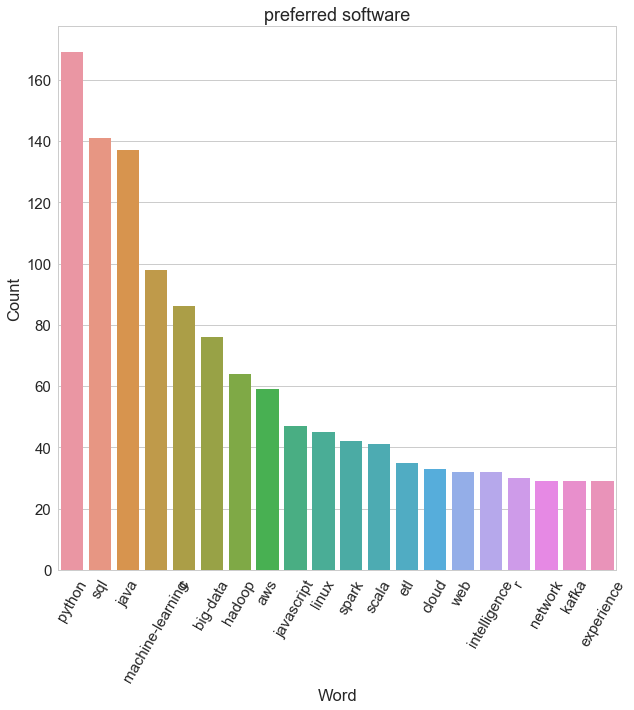

In [36]:
barplot(skills, 'preferred software')

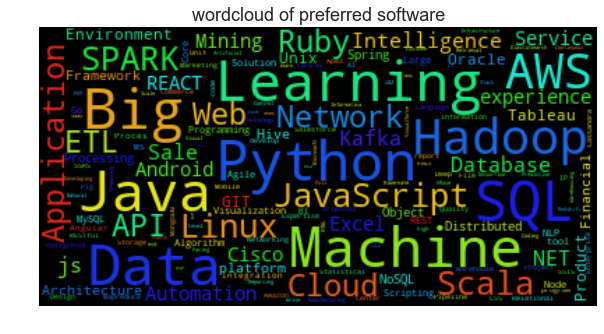

In [37]:
wordcloud(skills, 'preferred software')

# 3.) Analysis - Descriptions

In [77]:
description_df = master_data.copy()

In [79]:
#generate wordlist and lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [85]:
stop_list = stopwords.words('english')

/Users/tmm/anaconda3/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tmm/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


In [87]:
#preprocessing function
def my_preprocessing(s):
    s = s.lower() # downcase
    s = re.sub(r"\W"," ",s)
    s = re.sub(r"\d"," ",s) 
    s = re.sub(r"\s+[a-z]\s+"," ",s)
    s = re.sub(r"^[a-zA-Z\s*]*what you will be doing",'',s)
    s = re.sub(r"\s+",' ',s)
    return s

In [88]:
responsibilities=[]
benefits=[]
jddataset = description_df['Description']
for i in range(len(jddataset)):
    s = my_preprocessing(jddataset[i])
    if 'what in it for you' in s :
        responsibility = s.split('what in it for you')[0]
        benefit = s.split('what in it for you')[1]
    else:
        responsibility = s
        benefit = ''
    responsibilities.append(responsibility)
    benefits.append(benefit)

In [89]:
def my_tokenize(s):
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in set(stop_list)]# remove stopwords
    s = ' '.join(tokens)
    return s

In [90]:
#tokenize responsibilities
for i in range(len(responsibilities)):
    responsibilities[i] = my_tokenize(responsibilities[i])
    i = i+1

In [91]:
text = pd.DataFrame(responsibilities,columns = ['re'])
text['re']

0      traffic predictor risk assessment tool determi...
1      test iterate improve risk engine fraud modelsw...
2      become cornerstone company data science capabi...
3      data scientist engineer responsible following ...
4      data scientist experience please read located ...
5      working help build cool product primary respon...
6      descriptiondata scientist need analyze financi...
7      data scientist engineer responsible following ...
8      data scientist data mining data set statistic ...
9      data scientist machine learning python tableau...
10     data scientist southbaywe creating platform pr...
11     work data scientist product manager customer s...
12     ideal candidate expertise working large data s...
13     develop implement advanced statistical model p...
14     data scientist report chief technology officer...
15     ideal candidate expertise working large data s...
16     develop implement advanced statistical model p...
17     develop nlp system help 

In [93]:
text_list = [i.split() for i in text['re']]
len(text_list)

516

In [94]:
stopwords = ['experience', 'data']
for i in range(len(text_list)):
    for word in list(text_list[i]):  # iterating on a copy since removing will mess things up
        if word in stopwords:
            text_list[i].remove(word)

In [96]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print (dictionary)

/Users/tmm/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL
/Users/tmm/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Dictionary(4858 unique tokens: ['able', 'added', 'analytical', 'applied', 'apply']...)


/Users/tmm/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [97]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

516
[(8, 1), (11, 1), (17, 1), (20, 1), (22, 2), (28, 1), (32, 1), (33, 1), (64, 1), (81, 1), (83, 1), (86, 1), (90, 1), (131, 1), (138, 1), (151, 1), (158, 2), (162, 1), (167, 1), (168, 1), (179, 1), (182, 1), (241, 1), (243, 1), (252, 3), (329, 1), (354, 1), (375, 1), (418, 1), (422, 1), (520, 1), (539, 1), (541, 1), (550, 1), (589, 2), (600, 1), (615, 1), (662, 1), (719, 1), (725, 1), (791, 1), (957, 1), (986, 1), (1135, 1), (1170, 1), (1172, 1), (1224, 1), (1227, 1), (1266, 1), (1309, 1), (1330, 1), (1353, 1), (1502, 1), (1611, 1), (1630, 1), (1647, 1), (1705, 1), (1706, 1), (1707, 1), (1708, 1), (1710, 1), (1711, 1), (1713, 2), (1714, 1), (1715, 1), (1718, 1), (1719, 1)]


In [98]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [99]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print ('used: {:.2f}s'.format(time()-start))

used: 24.21s


In [100]:
for i in ldamodel.print_topics(): 
    for j in i: print (j)

0
0.013*"knowledge" + 0.012*"team" + 0.012*"work" + 0.012*"development" + 0.011*"software" + 0.010*"system" + 0.010*"test" + 0.009*"need" + 0.009*"testing" + 0.008*"product"
1
0.023*"learning" + 0.022*"machine" + 0.013*"model" + 0.012*"need" + 0.012*"science" + 0.011*"python" + 0.009*"analysis" + 0.009*"working" + 0.008*"building" + 0.008*"product"
2
0.022*"learning" + 0.018*"machine" + 0.014*"processing" + 0.012*"please" + 0.012*"image" + 0.010*"python" + 0.009*"year" + 0.009*"work" + 0.008*"looking" + 0.007*"big"
3
0.016*"knowledge" + 0.014*"sql" + 0.013*"system" + 0.011*"science" + 0.010*"business" + 0.010*"need" + 0.010*"year" + 0.010*"development" + 0.009*"project" + 0.009*"work"
4
0.018*"work" + 0.013*"year" + 0.013*"need" + 0.012*"engineer" + 0.012*"team" + 0.011*"top" + 0.009*"company" + 0.009*"learning" + 0.009*"machine" + 0.008*"python"
5
0.017*"project" + 0.013*"team" + 0.012*"analysis" + 0.010*"management" + 0.010*"need" + 0.010*"system" + 0.009*"skill" + 0.009*"business" +

In [101]:
ldamodel.save('topic.model')

In [104]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

/Users/tmm/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/tmm/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [105]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [106]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      18.644798        1       1 -0.072067  0.022882
8      15.432018        1       2 -0.068181  0.052796
1      12.631626        1       3  0.056640 -0.018630
9      12.200006        1       4 -0.067091  0.001205
3      11.142307        1       5 -0.073741 -0.041458
5       9.711713        1       6 -0.082972 -0.120337
7       6.464548        1       7 -0.028687 -0.064766
6       4.992866        1       8 -0.015232  0.155923
4       4.920425        1       9  0.121982  0.083644
2       3.859693        1      10  0.229349 -0.071258, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
17    Default  280.000000     learning  280.000000  30.0000  30.0000
20    Default  245.000000      machine  245.000000  29.0000  29.0000
1408  Default   79.000000   javascript   79.000000  28.0000  28.0000
85    Default  432.000000         work  432.000000  27.0000  27.0000
229   Default  109.000000   processing  109.000000  26.0000  26.0000
583   Default  241.000000      project  241.000000  25.0000  25.0000
422   Default  129.000000          web  129.000000  24.0000  24.0000
11    Default  217.000000     engineer  217.000000  23.0000  23.0000
28    Default  248.000000       python  248.000000  22.0000  22.0000
157   Default  221.000000     analysis  221.000000  21.0000  21.0000
427   Default  290.000000  application  290.000000  20.0000  20.0000
95    Default  367.000000     business  367.000000  19.0000  19.0000
1635  Default  122.000000     security  122.000000  18.0000  18.0000
24    Default  183.000000       please  183.000000  17.0000  17.0000
574   Default  201.000000          etc  201.000000  16.0000  16.0000
1259  Default  105.000000    framework  105.000000  15.0000  15.0000
308   Default   97.000000      looking   97.000000  14.0000  14.0000
123   Default  139.000000        model  139.000000  13.0000  13.0000
320   Default   97.000000    reporting   97.000000  12.0000  12.0000
181   Default  375.000000       design  375.000000  11.0000  11.0000
90    Default  112.000000    algorithm  112.000000  10.0000  10.0000
243   Default  116.000000        spark  116.000000   9.0000   9.0000
680   Default  195.000000        cloud  195.000000   8.0000   8.0000
33    Default  102.000000    scientist  102.000000   7.0000   7.0000
940   Default  231.000000   management  231.000000   6.0000   6.0000
510   Default  208.000000         java  208.000000   5.0000   5.0000
285   Default  199.000000          big  199.000000   4.0000   4.0000
32    Default  288.000000      science  288.000000   3.0000   3.0000
388   Default   76.000000          top   76.000000   2.0000   2.0000
86    Default  466.000000         year  466.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
17    Topic10   48.731827     learning  280.768555   1.5034  -3.7967
1121  Topic10   10.835461        space   25.928751   2.3821  -5.3002
414   Topic10   10.569178        right   27.101456   2.3129  -5.3251
20    Topic10   38.835514      machine  245.836777   1.4092  -4.0237
218   Topic10    6.695711       neural   13.170043   2.5781  -5.7816
24    Topic10   26.180380       please  183.225845   1.3089  -4.4181
816   Topic10    6.696511        three   14.979027   2.4495  -5.7815
308   Topic10   17.612860      looking   97.203865   1.5464  -4.8144
48    Topic10   13.327509         deep   65.472519   1.6628  -5.0932
28    Topic10   21.015448       python  248.530380   0.7843  -4.6378
1438  Topic10    6.479893  cybercoders   14.226898   2.4682  -5.8144
325   Topic10    9.295725        small   36.300095   1.8923  -5.4535
90    Topic10   13.503774    algorithm  112.100441   1.1382  -5.0801
285   Topic10   16.246056          big  199.067535   0.7488  -4.8952
85    Topic10   20.237068         work  432.053894   0.1935  -4.67

In [107]:
pyLDAvis.save_html(data,'vis.html')

/Users/tmm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='vis.html' mode='w' encoding='UTF-8'>
  """Entry point for launching an IPython kernel.


In [108]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('topic.model')

CPU times: user 5.47 ms, sys: 2.99 ms, total: 8.46 ms
Wall time: 7.12 ms


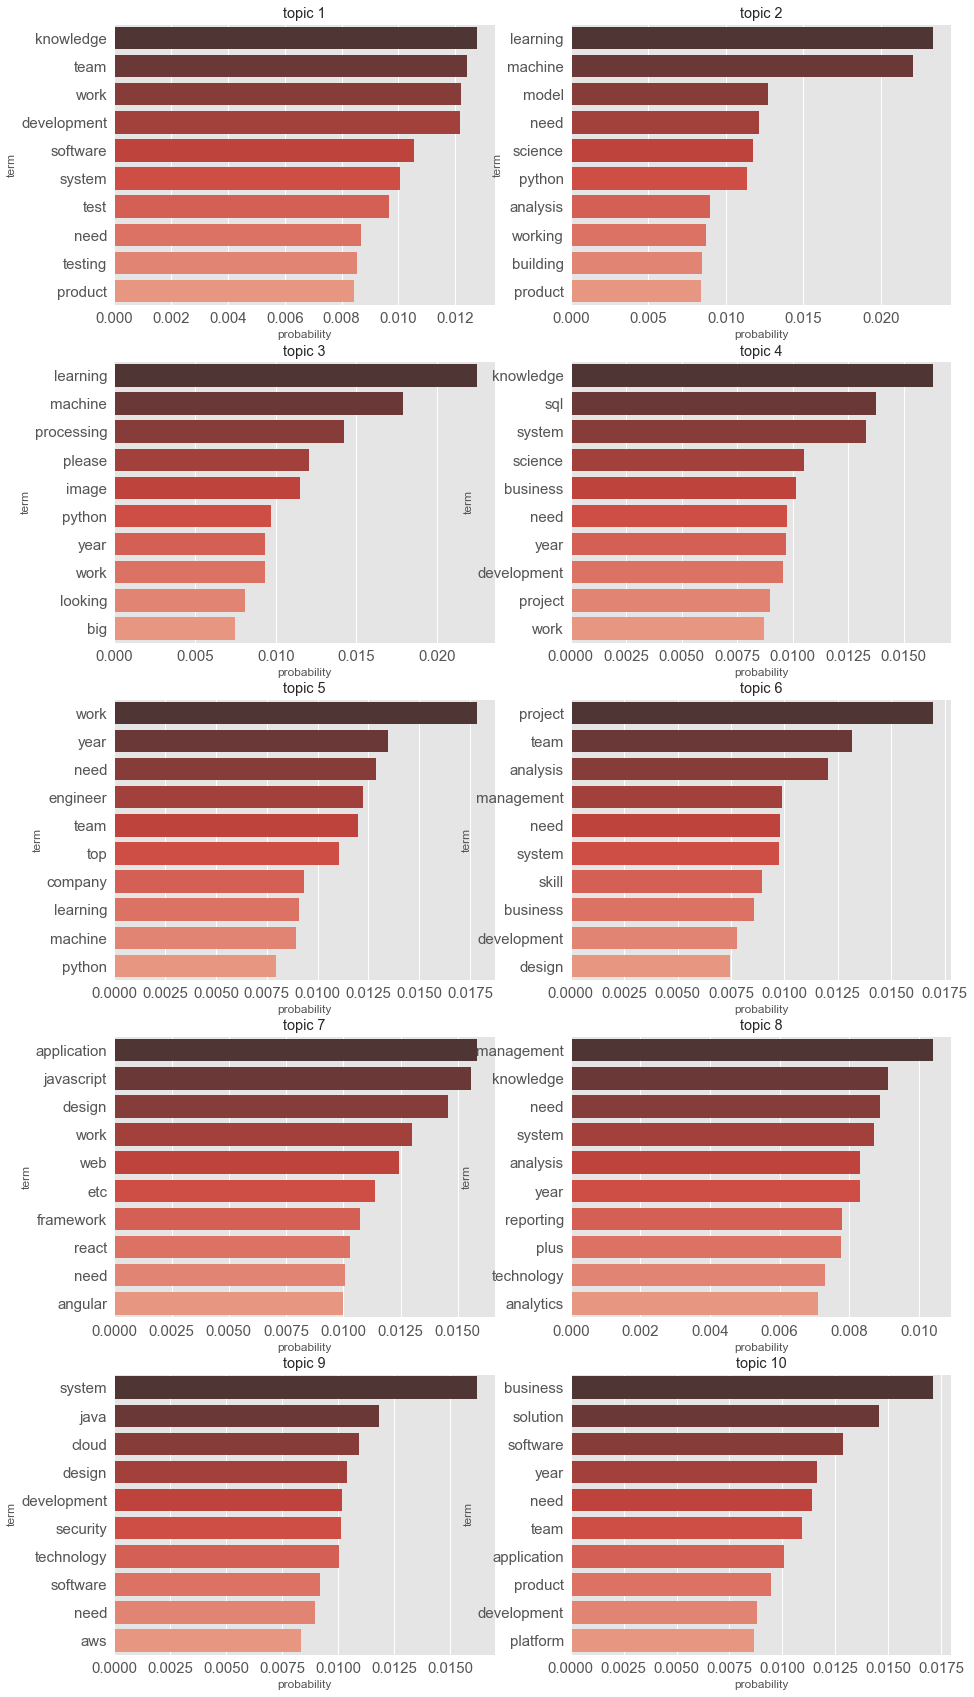

In [109]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

In [110]:
#Part 3: word frequency
word2count = {}
for data in responsibilities:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [111]:
word2count.pop('data')
word2count.pop('experience')

1698

In [112]:
#sort words 
from collections import OrderedDict
sorted_word = OrderedDict(sorted(word2count.items(), 
                                  key=lambda kv: kv[1], reverse=True))
sorted_word

OrderedDict([('need', 605),
             ('system', 566),
             ('team', 534),
             ('year', 508),
             ('knowledge', 485),
             ('development', 484),
             ('work', 472),
             ('design', 405),
             ('business', 394),
             ('software', 391),
             ('product', 343),
             ('working', 336),
             ('technology', 334),
             ('application', 316),
             ('solution', 313),
             ('science', 310),
             ('tool', 308),
             ('learning', 308),
             ('machine', 269),
             ('python', 269),
             ('project', 262),
             ('strong', 261),
             ('skill', 261),
             ('position', 258),
             ('management', 250),
             ('sql', 248),
             ('analysis', 241),
             ('engineer', 238),
             ('develop', 234),
             ('engineering', 232),
             ('platform', 230),
             ('new', 226),
         

In [113]:
#choose most frequent ones
freq_words = heapq.nlargest(1000,word2count,key = word2count.get)
freq_words

['need',
 'system',
 'team',
 'year',
 'knowledge',
 'development',
 'work',
 'design',
 'business',
 'software',
 'product',
 'working',
 'technology',
 'application',
 'solution',
 'science',
 'tool',
 'learning',
 'machine',
 'python',
 'project',
 'strong',
 'skill',
 'position',
 'management',
 'sql',
 'analysis',
 'engineer',
 'develop',
 'engineering',
 'platform',
 'new',
 'environment',
 'service',
 'java',
 'etc',
 'big',
 'degree',
 'cloud',
 'please',
 'database',
 'computer',
 'building',
 'process',
 'plus',
 'technical',
 'test',
 'using',
 'related',
 'performance',
 'analytics',
 'testing',
 'build',
 'ability',
 'customer',
 'understanding',
 'architecture',
 'quality',
 'apply',
 'including',
 'code',
 'support',
 'developing',
 'high',
 'model',
 'company',
 'problem',
 'user',
 'based',
 'large',
 'web',
 'aws',
 'requirement',
 'senior',
 'programming',
 'developer',
 'security',
 'language',
 'today',
 'spark',
 'hadoop',
 'field',
 'client',
 'distributed',
 'al

In [115]:
import plotly.offline as pyo
from plotly.graph_objs import * 
import plotly.plotly as py
import pandas as pd
from pandas import DataFrame

pyo.offline.init_notebook_mode()

frequency = {'type' : 'bar',
             'orientation' : 'h',
             'y' : key,
             'x' : value,
             'marker' : {'color' : 'purple'},
             'opacity' : 0.5}

layout = {'title' : "Word Frequency",
         'xaxis' : {'title' : 'Count'},
         'yaxis' : {'title' : 'Words'}}

fig = {'data' : [frequency],
      'layout' : layout}
pyo.iplot(fig)

NameError: name 'key' is not defined